# Portfolio Optimisation Modelled with Slime
### Laine Mulvay
### October 27, 2023
### MATH3024 Final Report

## 1. Introduction
Unlike simple and complicated systems, complex systems sit between these extremes. They comprise a large number of parts that experience non-trivial interactions across multiple scales, making them challenging to model using traditional mathematical methods. Instead, computation is employed to model systems considering an initial condition, specific properties, and intricate interactions. While no model can fully capture every nuance of a complex system, these computational approaches provide invaluable tools for researchers to gain insights, make predictions, and understand the intricate interplay of components within these systems.

In nature, the Slime mould, Physarum polycephalum, serves as a compelling model for complex systems research. This simple organism adeptly optimises its network structure to find nutrients and avoid obstacles like salt areas. Its behavior offers valuable insights into efficient network designs and enhances our comprehension of other complex real-slime systems.

This project will look at the implementation of Physarum polycephalum modeling to finance, focusing on Portfolio Optimisation. A portfolio represents a combination of various stocks, each with an expected risk and return, and holding a designated weight in the portfolio. The portfolio’s overall expected return is a weighted sum of individual stock returns. The portfolio’s risk, on the other hand, considers not just individual stock risks but also the correlations between stocks. Given the assumptions of expected risk and returns of individual stocks, the optimisation problem involves finding stock weights that maximise the expected return of the portfolio while minimising its risk.

In his groundbreaking 1952 paper, ”Portfolio Selection,” Harry Markowitz presented a mathematical framework for portfolio optimisation [Mar52]. By detailing how to determine optimal stock weights mathematically, he established a systematic method to find the optimal balance between portfolio risk and return. This was based on the statistical determination of expected risk and re-turn of stocks using historical data. This methodology has since become a cornerstone in modern financial theory and will be the basis for this project.

In this project, a computational model will be used to simulate the behavior of Physarum polycephalum and harness its characteristics to address the portfolio optimisation challenge. The aim of the project is to study how effective the model is when compared to the results found by Markowitz’s optimisation. It is noted that no existing literature exists for a similar implementation of Physarum polycephalum.


# 2. Traditional Portfolio Optimisation


## 2.1 Portfolio Theory 
The expected return of a portfolio can be calculated as:

$
E(r_P) = \sum_{i=1}^{j} w_i E(r_i)
$

Where each $w_i$ is a weight of the stock $i$ in the portfolio and $E(r_i)$ is the expected return of stock $i$.

Using matrices, we can represent the formula as:

$
E(r_p) = \mathbf{W}^T \mathbf{R} = \begin{bmatrix}
w_1 & \cdots & w_j
\end{bmatrix}
\begin{bmatrix}
E(r_1) \\
\vdots \\
E(r_j)
\end{bmatrix}
$

where $\mathbf{W}$ is a matrix containing the weights and $\mathbf{R}$ is a matrix compiling the expected retruns of stocks.


In portfolio theory, the risk of a stock or portfolio can be represented by the standard deviation ($\sigma$) of its returns (how much the price moves around).

Like the expected return, the risk of the portfolio can be calculated using the risk ($\sigma_i$) and expected returns ($E(r_i)$) of individual stocks and their respective weights ($w_i$). The covariance between stocks is also needed:

$
\sigma^2_p = \sum_{i=1}^{n} w_i^2 \sigma_i^2 + 2 \sum_{i=1}^{n} \sum_{j>i}^{n} w_i w_j \sigma_{ij}
$

Again, we can represent this formula with matrices:

$
\sigma^2_p = \mathbf{W}^T \mathbf{S} \mathbf{W} = \begin{bmatrix}
w_1 & \cdots & w_j
\end{bmatrix}
\begin{bmatrix}
\sigma_{11} & \cdots & \sigma_{1j} \\
\vdots & \ddots & \vdots \\
\sigma_{j1} & \cdots & \sigma_{jj}
\end{bmatrix}
\begin{bmatrix}
W_1 \\
\vdots \\
W_j
\end{bmatrix}
$

where $\mathbf{W}$ is the covarience matrix.


Given these formulas, the task of Portfolio Optimisation is to maximise $E(r_p)$ for a given level of $\sigma$ looks a little clearer. We can introduce a metric to assess the risk-adjusted performance of a portfolio developed by Nobel laureate William F. Sharpe.

$ \text{Sharpe Ratio} = \frac{E(r_p) - R_f}{\sigma_p}$

$R_f$ is the risk-free rate (the rate of return on an investment that has zero chance of loss). In practice, the U.S. 10-Year Treasury is used and at the time of writing it has a yield of about 5.0%

Now, we can see the path to optimising this ratio given the constraint $\sum_{i=1}^{j} w_i = 1$

# 2.2 Portfolio Optimisation Implementation

### 2.2.1 Data Collection

To build our model (and portfolio) we need a group of stocks with expected returns and standard deviations. We are going to use the top 10 stocks listed on the ASX (Australian Stock Exchange) by market capitalisation as the pool of stocks used to build the portfolio.

The stocks are (decending order of market capitalisation):
- BHP Billiton Limited (ASX:BHP)
- Commonwealth Bank of Australia (ASX:CBA)
- CSL Limited (ASX:CSL)
- National Australia Bank Limited (ASX:NAB)
- Australia and New Zealand Banking Group Limited (ASX:ANZ)
- Westpac Banking Corporation (ASX:WBC)
- Woodside Petroleum Limited (ASX:WPL)
- Fortescue Metals Group Limited (ASX:FMG)
- Macquarie Group Limited (ASX:MQG)
- Wesfarmers Limited (ASX:WES)

In modern portfolio theory, the average historical return of a stock is used as an approximation for expected future returns, and the historical standard deviation of returns is used to approximate the riskiness of a stock. 

Using Yahoo Finance (https://au.finance.yahoo.com/) we can view and download the historical daily closing price for each of the stocks for the last year.

### 2.2.2 Optimisation in Excel 
After downloading the data we can calculate the daily returns for each stock by finding its percentage change from the previous close. Using this, the covariance matrix $\mathbf{S}$ can be calculated using the COVAR function.

The expected portfolio return and portfolio risk can be calculated using the following formulas respectively:
- {=mmult(transpose($\mathbf{W}$),$\mathbf{R}$)}
- {=sqrt(mmult(mmult(transpose($\mathbf{W}$),$\mathbf{R}$),$\mathbf{W}$))}

After calculating the Sharpe Ratio, we can use Excel's Solver Add-In to complete the optimisation. 
- Set Objective = Sharpe Ratio
- Max
- Constraint: Sum of weights = 1
- Make Unconstrained Variables Non-Negative
- SOLVE

Now the optimal portfolio has been found and is identified by the new weights for the chosen stocks. The results from this theoretical optimisation can be found in 4.0 Final Result, where they are compared with the results of the slime model.

# 3. Slime Model

## 3.1 Model Description

### 3.1.1 Expected Retrun
Stocks will be represented as nutrients. The size of the nutrient will be proportional to the stocks expected return (a linear mapping from [-1,1] to [0,1])

### 3.1.2 Variance-Covariance Matrix
The variance of a particular stock is represented by the terrain near the nutrient. A higher variance of a stock will represent more challenging terrains near the respective nutrient for the stock.

The covariance between stocks is represented by the distance between nutrients. stocks with a lower covariance are closer together. The mapping of covariances is mapped to a (??) space.

### 3.1.3 Stock Weights
After a sutiable amount of time steps, cells will accumulate around nutrints in different concerntrations. Thses concertrations are reflective of the weights of stocks in the portfolio built by the model.

### 3.1.4 Model Choice
The model will be implemented using cellular automata. This is a clear choice given stock's expected returns do not change (nutrients will not be consumed). Agent-Based Modeling was also considered but due to the lack of need for interactions between agents (slime), the complexity is unnecessary. Reaction-diffusion also adds additional complexity and makes reaching a steady state more challenging.


## 3.2 Model Implementation

### 3.2.1 Model Explanation

**World:**
- A 2D square grid (50x50) with periodic boundaries.

**States:**
- Each cell has a state represented by a tuple $(S, N, C, R, T)$ with all variables ∈[0,1]:
  - $S$: S: Slime concentration, initially set to a random value between 0 and 0.1.
  - $N$: Nutrient concentration at nutrient locations, determined by a linear normalisation of the expected returns of the corresponding asset. Set to 0 for all cells that are not nutrients.
  - $C$: Nutrient concentration of the cell (excluding cells with nutrients), calculated based on the distance from  nutrient positions and this nutrients concentration. Concentration decreases with Euclidean distance (L2 norm) form the nutrient.
  - $R$: Terrain roughness of the cell (excluding cells with nutrients), calculated based on the distance from  nutrient positions and this nutrients roughness. Terrain roughness decreases with Euclidean distance (L2 norm) form the nutrient.
  - $T$: Terrain roughness at nutrient positions, determined by the variance of the corresponding asset. Set to 0 for all cells that are not nutrients.

**Initialisation:**
- Nutrients are placed in the world with distances between them representing covariances between stocks (higher covariance means larger distance). These distances and corresponding coordinates in the world are calculated first using Multi-Dimensional Scaling.
- Size of nutrients is proportional to expected returns.
- Nutrient concentration linearly decreases with distance from the nutrient.
- Terrain difficulty is initialised with cells adjacent to nutrients having levels proportional to the corresponding stock's variance. A higher variance (risky stock) corresponds to increased terrain roughness
- Slime is randomly initialised in all cells that do not contain nutrients, with equal concentration.

**Neighbourhood:**
- Moore neighbourhood (the 8 surrounding squares and the cell itself).

**Rules:**
- At each time step, slime in each cell decides to move to one of its neighbouring cells based on a weighted sum of nutrient concentration and terrain roughness.
- The movement is influenced by the ALPHA parameter, which determines the weight between attraction to nutrients and avoidance of rough terrain.
- The nutrient concentration and terrain roughness contribute to the probabilities of slime movement, with the final decision being stochastic.
- Nutrients and terrain are static throughout the simulation, and slime concentrations are updated based on movement decisions.
- If the slime concentration in a cell exceeds 1 after an update, the excess slime is evenly distributed to the neighbouring cells. This process of diffusion helps to prevent the concentration in any single cell from becoming excessively high and ensures a more even distribution of slime across the grid.
- Cells containing nutrients do not hold or accumulate slime; any slime attempting to move into these cells is redistributed to neighbouring cells.
- The slime’s movement is also influenced by a non-linear transformation, controlled by the POWER parameter, which is applied to the probabilities calculated from nutrient concentration and terrain roughness. This transformation can create more distinct paths of movement and patterns in the slime distribution.
- The model runs for a predetermined number of frames, specified by NUM_FRAMES, with the distribution of slime and the calculated portfolio statistics updated in each frame.

**Visualisation:**
- The model is represented by an animation over the frames (one frame represents the distribution of slime after 1 update of all of the slime positions and concentrations).
- The grid is visualised with a black background. Slime is represented in varying shades of green, with the intensity corresponding to the concentration of slime in each cell.
- Nutrients are represented as white cells.
- Terrain roughness can be visualised separately, with higher roughness represented by more intense blue shades.
- Nutrient concentration can also be visualised separately, with higher nutrient concentrations represented by more intense white shades.


### 3.2.2 Building the Model

First, we must download the relevant libraries.

In [577]:
import numpy as np
from IPython.display import display, HTML, Javascript
import scipy.spatial
from scipy.spatial import Voronoi
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'

Lets use our Variance-Covariance matrix to represent stocks on our 2D grid using Multi-Dimensional Scaling (MDS). This way, the distances between nutrients will be representative of the correlation between stocks. We also want to include information about the stocks expected returns

In [578]:
GRID_SIZE = 50

# Stock names
stock_names = ["BHP", "CBA", "CSL", "NAB", "ANZ", "WBC", "WDS", "FMG", "MQG", "WES"]

# Expected yearly returns (percentages)
decimal_expected_returns = np.array([10.74, -2.74, -11.18, -10.09, -1.52, -12.86, -1.43, 24.21, 0.26, 15.23]) / 100

# Variance-Covariance matrix
covariance_matrix = np.array([
    [0.000240471, 2.91286E-05, 5.99908E-05, 3.43272E-05, 2.26545E-05, 3.428E-05, 0.000109893, 0.000265912, 6.0174E-05, 4.94277E-05],
    [2.91286E-05, 0.000101151, -2.4588E-06, 8.50427E-05, 7.63385E-05, 7.94345E-05, 3.75347E-05, 3.01791E-05, 6.40935E-05, 4.21034E-05],
    [5.99908E-05, -2.4588E-06, 0.00041126, -7.58193E-06, -5.94725E-06, 1.39617E-06, -6.434E-06, 0.000101893, 1.58612E-06, 3.0098E-06],
    [3.43272E-05, 8.50427E-05, -7.58193E-06, 0.000132363, 9.23785E-05, 9.64133E-05, 5.072E-05, 4.23094E-05, 7.76649E-05, 4.45904E-05],
    [2.26545E-05, 7.63385E-05, -5.94725E-06, 9.23785E-05, 0.000123621, 9.53878E-05, 3.70747E-05, 2.56789E-05, 8.47564E-05, 4.54476E-05],
    [3.428E-05, 7.94345E-05, 1.39617E-06, 9.64133E-05, 9.53878E-05, 0.000123309, 4.05552E-05, 4.15902E-05, 6.98502E-05, 4.19828E-05],
    [0.000109893, 3.75347E-05, -6.434E-06, 5.072E-05, 3.70747E-05, 4.05552E-05, 0.000273312, 0.000108724, 6.11459E-05, 3.34397E-05],
    [0.000265912, 3.01791E-05, 0.000101893, 4.23094E-05, 2.56789E-05, 4.15902E-05, 0.000108724, 0.000490893, 8.28207E-05, 3.95489E-05],
    [6.0174E-05, 6.40935E-05, 1.58612E-06, 7.76649E-05, 8.47564E-05, 6.98502E-05, 6.11459E-05, 8.28207E-05, 0.000177021, 7.12123E-05],
    [4.94277E-05, 4.21034E-05, 3.0098E-06, 4.45904E-05, 4.54476E-05, 4.19828E-05, 3.34397E-05, 3.95489E-05, 7.12123E-05, 0.000117399]
])

# Step 1: Convert Covariance Matrix to Correlation Matrix
variances = np.sqrt(np.diag(covariance_matrix))
correlation_matrix = covariance_matrix / np.outer(variances, variances)

# Normalize the variance values to the range [0, 1] - we will need these for setting the roughness of terrain
normalised_variances = (variances - np.min(variances)) / (np.max(variances) - np.min(variances))

# Step 2: Ensure Valid Correlation Coefficients
valid_correlation_matrix = np.clip(correlation_matrix, -1, 1)

# Step 3: Calculate Distance Matrix
distance_matrix = np.sqrt(2 * (1 - valid_correlation_matrix))

# Step 4: Apply Multi-Dimensional Scaling (MDS)
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, normalised_stress='auto')
reduced_coordinates = mds.fit_transform(distance_matrix)

# Step 5: Normalize Coordinates to Fit in a 50x50 Grid
min_coords = np.min(reduced_coordinates, axis=0)
max_coords = np.max(reduced_coordinates, axis=0)
normalised_coordinates = np.floor((GRID_SIZE -1) * (reduced_coordinates - min_coords) / (max_coords - min_coords)).astype(int)
normalised_coordinates = np.clip(normalised_coordinates, 0, (GRID_SIZE - 1))

# Step 6: Round Coordinates to Nearest Integer
rounded_coordinates = np.round(normalised_coordinates).astype(int)

# Step 7: Normalize Expected Returns to [0, 1] Scale
min_return = np.min(decimal_expected_returns)
max_return = np.max(decimal_expected_returns)
normalised_returns = np.round((decimal_expected_returns - min_return) / (max_return - min_return), 2)

# Step 8: Combine Coordinates, Expected Returns and Normalized Expected Returns
combined_data = np.hstack((rounded_coordinates, decimal_expected_returns.reshape(-1, 1), normalised_returns.reshape(-1, 1)))

# Step 9: Create DataFrame
df = pd.DataFrame(combined_data, columns=['X', 'Y', 'Expected Return', 'Normalized Expected Return'])
df['Stock'] = stock_names
df = df[['Stock', 'X', 'Y', 'Expected Return', 'Normalized Expected Return']]

df['X'] = df['X'].astype(int)
df['Y'] = df['Y'].astype(int)
df['Expected Return'] = (df['Expected Return'].astype(float) * 100).map('{:.2f}%'.format)
df['Normalized Expected Return'] = df['Normalized Expected Return'].astype(float)
df['Variance'] = np.round(variances, 4)
df['Normalized Variance'] = np.round(normalised_variances, 2)


# Step 10: Print Results
print(df)

  Stock   X   Y Expected Return  Normalized Expected Return  Variance  \
0   BHP  22  42          10.74%                        0.64    0.0155   
1   CBA  30  10          -2.74%                        0.27    0.0101   
2   CSL   0  41         -11.18%                        0.05    0.0203   
3   NAB  41  16         -10.09%                        0.07    0.0115   
4   ANZ  34   0          -1.52%                        0.31    0.0111   
5   WBC  45   8         -12.86%                        0.00    0.0111   
6   WDS  49  39          -1.43%                        0.31    0.0165   
7   FMG  28  48          24.21%                        1.00    0.0222   
8   MQG  15   5           0.26%                        0.35    0.0133   
9   WES   4  15          15.23%                        0.76    0.0108   

   Normalized Variance  
0                 0.45  
1                 0.00  
2                 0.84  
3                 0.12  
4                 0.09  
5                 0.09  
6                 0.5

Sweet, Now we have the information for nutrient initialisation on our grid. Lets code up the model and displays. Note that return statements in calculate_portfolio_statistics() are used for Model Analysis 3.3.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Stock Name Coordinates Expected Return  Nutrient Concentration  Variance  \
0        BHP    (22, 42)          10.74%                    0.64  0.015507   
1        CBA    (30, 10)          -2.74%                    0.27  0.010057   
2        CSL     (0, 41)         -11.18%                    0.05  0.020280   
3        NAB    (41, 16)         -10.09%                    0.07  0.011505   
4        ANZ     (34, 0)          -1.52%                    0.31  0.011118   
5        WBC     (45, 8)         -12.86%                    0.00  0.011104   
6        WDS    (49, 39)          -1.43%                    0.31  0.016532   
7        FMG    (28, 48)          24.21%                    1.00  0.022156   
8        MQG     (15, 5)           0.26%                    0.35  0.013305   
9        WES     (4, 15)          15.23%                    0.76  0.010835   

   Terrain Roughness  Slime Concentration   Weights  
0           0.450440            31.066871  0.481361  
1           0.000000            1

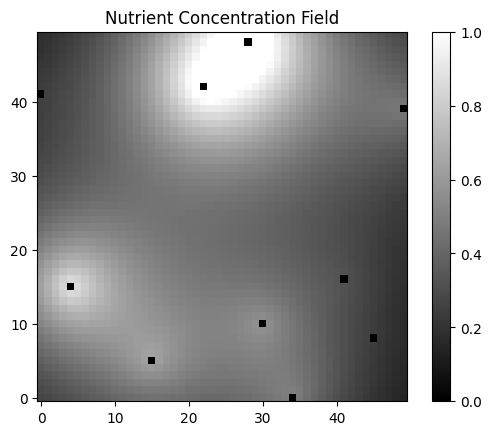

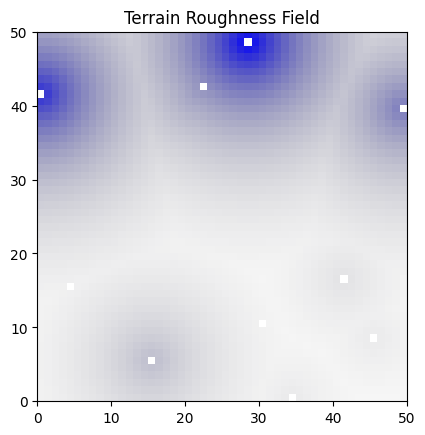

In [586]:
RISK_FREE_RATE = 0.05 # Risk-free rate of return used in the Sharpe ratio. It is roughly the current yield on U.S. 10 Year Treasuries as of 27/10/2023

class SlimeModel:
    def __init__(self, GRID_SIZE, nutrients_info, decimal_expected_returns, covariance_matrix, ALPHA=0.5, POWER=50, NUM_FRAMES=30):
        self.GRID_SIZE = GRID_SIZE
        self.actual_nutrients_concentration = np.zeros((GRID_SIZE, GRID_SIZE))
        self.nutrient_concentration = np.zeros((GRID_SIZE, GRID_SIZE))
        self.slime = np.random.rand(GRID_SIZE, GRID_SIZE) * 0.1
        self.nutrient_terrain = np.zeros((GRID_SIZE, GRID_SIZE))  
        self.roughness = np.zeros((GRID_SIZE, GRID_SIZE)) 
        self.nutrients_info = nutrients_info
        self.decimal_expected_returns = decimal_expected_returns
        self.covariance_matrix = covariance_matrix
        self.ALPHA = ALPHA # Weight for the weighted sum (how much its attracted to nutrients)
        self.POWER = POWER # Power for the non-linear transformation
        self.NUM_FRAMES = NUM_FRAMES # number of frames for the animation
        
        self.S = self.slime  # Slime concentration
        self.N = self.actual_nutrients_concentration  # Nutrient size
        self.C = self.nutrient_concentration  # Nutrient concentration of all cells
        self.R = self.roughness # Terrain roughness of all cells
        self.T = self.nutrient_terrain # Terrain roughness of nutrient cell
        self.state = np.stack((self.S, self.N, self.C, self.R, self.T), axis=-1)

        self.nutrient_positions = []
        self.expected_returns = []
        for index, row in nutrients_info.iterrows():
            x, y = int(row['X']) % self.GRID_SIZE, int(row['Y']) % self.GRID_SIZE
            self.nutrient_positions.append((x, y))
        
        for index, (x, y) in enumerate(self.nutrient_positions):
            self.actual_nutrients_concentration[x, y] = normalised_returns[index] # Set nutrient concentrations for each nutrient
            self.nutrient_terrain[x, y] = normalised_variances[index]  # Set terrain roughness at each nutrient location
            self.slime[x, y] = 0  # Ensure cells with nutrients have no slime
    
        # Calculate nutrient concentration gradient and terrain roughness
        self.calculate_concentration_and_terrain()
        
    def calculate_portfolio_statistics(self):
        if not self.nutrient_positions:
            print("No nutrients found")
            return

        nutrient_positions = np.array(self.nutrient_positions)

        # Create a Voronoi diagram to find the regions around each nutrient
        vor = Voronoi(nutrient_positions)

        # For each cell in the grid, find the region it belongs to (i.e., its closest nutrient)
        X, Y = np.meshgrid(np.arange(self.GRID_SIZE), np.arange(self.GRID_SIZE))
        points = np.c_[X.ravel(), Y.ravel()]
        voronoi_kdtree = scipy.spatial.KDTree(nutrient_positions)
        _, indexes = voronoi_kdtree.query(points)
        cell_assignment = indexes.reshape((self.GRID_SIZE, self.GRID_SIZE)).T  # Transpose to match the slime matrix

        # Calculate the slime concentration for each nutrient
        concentrations = np.zeros(len(self.nutrient_positions))
        for i in range(self.GRID_SIZE):
            for j in range(self.GRID_SIZE):
                nutrient_index = cell_assignment[i, j]
                concentrations[nutrient_index] += self.slime[i, j]

        # Retrieve stock names from the DataFrame
        stock_names = self.nutrients_info['Stock'].tolist()

        # Format the "Expected Return" as a percentage
        expected_return_percentage = (self.decimal_expected_returns * 100).round(2)
        expected_return_percentage = [f'{x:.2f}%' for x in expected_return_percentage]

        # Create a DataFrame to store the results
        results = pd.DataFrame({
            "Stock Name": stock_names,
            "Coordinates": self.nutrient_positions,
            "Expected Return": expected_return_percentage,
            "Nutrient Concentration": normalised_returns,
            "Variance": variances,
            "Terrain Roughness": normalised_variances,
            "Slime Concentration": concentrations,
        })

        # Calculate portfolio weights based on slime concentration
        total_concentration = concentrations.sum()
        if total_concentration == 0:
            print("Total slime concentration is 0, cannot calculate weights")
            return None
        
        weights = concentrations / total_concentration
        results['Weights'] = weights
        
        # Calculate expected return of the portfolio
        portfolio_return = (weights * self.decimal_expected_returns).sum()
        portfolio_variance = np.dot(weights.T, np.dot(self.covariance_matrix, weights))
        portfolio_std_dev = np.sqrt(portfolio_variance)

        # Calculate the Sharpe Ratio
        sharpe_ratio = (portfolio_return - RISK_FREE_RATE) / portfolio_std_dev

        # Print the results for the portfolio
        print(results)
        print("Total Expected Return of the Portfolio: {:.2f}%".format(portfolio_return * 100))
        print("Expected Standard Deviation of the Portfolio: {:.2f}%".format(portfolio_std_dev * 100))
        print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))

        return portfolio_return, portfolio_std_dev, sharpe_ratio

    def calculate_concentration_and_terrain(self):
        for index, (nx, ny) in enumerate(self.nutrient_positions):
            nutrient_concentration = self.actual_nutrients_concentration[nx, ny]
            terrain_at_nutrient = self.nutrient_terrain[nx, ny]

            for x in range(self.GRID_SIZE):
                for y in range(self.GRID_SIZE):
                    if (x, y) in self.nutrient_positions:
                        continue
                    distance = np.sqrt((nx - x) ** 2 + (ny - y) ** 2)
                    contribution = nutrient_concentration * np.exp(-0.1 * distance)
                    terrain_contrib = terrain_at_nutrient * np.exp(-0.1 * distance)

                    self.nutrient_concentration[x, y] += contribution
                    self.roughness[x, y] = max(self.roughness[x, y], terrain_contrib)

        self.nutrient_concentration = np.clip(self.nutrient_concentration, 0, 1)
        self.roughness = np.clip(self.roughness, 0, 1)
               
    def get_neighbors(self, x, y):
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                nx, ny = (x + dx) % self.GRID_SIZE, (y + dy) % self.GRID_SIZE
                neighbors.append((nx, ny))
        return neighbors

    def update(self):
        new_slime = np.zeros_like(self.slime)
        
        for x in range(self.GRID_SIZE):
            for y in range(self.GRID_SIZE):
                # Skip the update if the current cell is a nutrient
                if (x, y) in self.nutrient_positions:
                    continue
                
                neighbors = self.get_neighbors(x, y)
            
                # Calculate probabilities based on nutrient concentration
                nutrient_probs = np.array([self.nutrient_concentration[nx, ny] for nx, ny in neighbors])
                
                # Calculate probabilities based on terrain roughness
                terrain_probs = 1 - np.array([self.roughness[nx, ny] for nx, ny in neighbors])
                
                # Combine probabilities using weighted sum
                combined_probs = self.ALPHA  * nutrient_probs + (1 - self.ALPHA ) * terrain_probs

                # Apply non-linear transformation
                transformed_probs = combined_probs ** POWER
                
                # Normalise the transformed probabilities
                normalised_probs = transformed_probs / transformed_probs.sum()
            
                # Make the movement decision
                chosen_neighbor_idx = np.random.choice(len(neighbors), p=normalised_probs)
                new_x, new_y = neighbors[chosen_neighbor_idx]
                
                # Update slime concentrations
                if self.nutrient_concentration[new_x, new_y] == 0:
                    new_slime[x, y] += self.slime[x, y]
                else:
                    new_slime[new_x, new_y] += self.slime[x, y]
                    
        # Diffuse the slime if concentration is greater than 1
        for x in range(self.GRID_SIZE):
            for y in range(self.GRID_SIZE):
                if new_slime[x, y] > 1:
                    excess_slime = new_slime[x, y] - 1
                    new_slime[x, y] = 1

                    neighbors = self.get_neighbors(x, y)
                    
                    if neighbors:
                        excess_per_neighbor = excess_slime / len(neighbors)
                        for nx, ny in neighbors:
                            new_slime[nx, ny] += excess_per_neighbor
        
        self.slime = new_slime

    def plot_nutrient_concentration(self):
        fig, ax = plt.subplots()
        concentration_image = ax.imshow(model.nutrient_concentration.T, cmap='gray', vmin=0, vmax=1, origin='lower')
        plt.colorbar(concentration_image)
        ax.set_title('Nutrient Concentration Field')
        plt.show()

    def plot_terrain(self):
        rough_terrain_colors = np.zeros((self.GRID_SIZE, self.GRID_SIZE, 4))
        rough_terrain_colors[:, :, 2] = self.roughness.T  # Set blue channel
        rough_terrain_colors[:, :, 3] = self.roughness.T  # Set ALPHA  channel

        fig, ax = plt.subplots()
        ax.imshow(rough_terrain_colors, extent=[0, self.GRID_SIZE, 0, self.GRID_SIZE], origin='lower')
        ax.set_title('Terrain Roughness Field')
        plt.show()
        
# HTML and JavaScript code to create and display the progress bar
progress_bar_html = """
<div id="progress-text" style="color: white; font-size: 16px; margin-bottom: 5px;">Animation Progress</div>
<div id="progress-container" style="width: 100%; background-color: black; border: 1px solid lime;">
  <div id="progress-bar" style="width: 0%; height: 30px; background-color: lime; text-align: center; line-height: 30px; color: white;">0%</div>
</div>
<div id="frame-info" style="color: white; font-size: 16px; margin-top: 5px;">Frame 0/{NUM_FRAMES}</div>
<script type="text/javascript">
function updateProgressBar(frame, totalFrames) {
  var percentage = Math.round(((frame + 1) / totalFrames) * 100);
  var bar = document.getElementById('progress-bar');
  var frameInfo = document.getElementById('frame-info');
  bar.style.width = percentage + '%';
  bar.innerHTML = percentage + '%';
  frameInfo.innerHTML = 'Frame ' + (frame + 1) + '/' + totalFrames;
  if (frame + 1 === totalFrames) {
    hideProgressBar();
  }
}
function hideProgressBar() {
  var progressBarContainer = document.getElementById('progress-container');
  var frameInfo = document.getElementById('frame-info');
  var progressText = document.getElementById('progress-text');
  progressBarContainer.style.display = 'none';
  frameInfo.style.display = 'none';
  progressText.style.display = 'none';
}
</script>
"""

# Create the SlimeModel with nutrients_info from df
model = SlimeModel(GRID_SIZE, nutrients_info=df, decimal_expected_returns=decimal_expected_returns, covariance_matrix=covariance_matrix, ALPHA=0.5, POWER=50, NUM_FRAMES=20)

# Display the progress bar HTML (not needed, but it was satisfying to make)
display(HTML(progress_bar_html))

# Give nutrients a white color 
nutrient_colors = np.zeros((model.GRID_SIZE, model.GRID_SIZE, 4))
for x, y in model.nutrient_positions:
    nutrient_colors[y, x] = [1, 1, 1, 1]  # White color for nutrients

def update(frame):
    ax.clear()
    ax.set_facecolor('black')

    model.update()

    # Display nutrients
    ax.imshow(nutrient_colors, extent=[0, model.GRID_SIZE, 0, model.GRID_SIZE], origin='lower')

    # Display slime
    slime_colors = np.zeros((model.GRID_SIZE, model.GRID_SIZE, 4))
    slime_concentration = model.slime.T.copy()
    slime_concentration[slime_concentration > 1] = 1
    slime_colors[:, :, 1] = slime_concentration  # Green channel
    slime_colors[:, :, 3] = slime_concentration  # ALPHA  channel
    ax.imshow(slime_colors, extent=[0, model.GRID_SIZE, 0, model.GRID_SIZE], origin='lower', vmin=0, vmax=1)

    # Update the progress bar
    display(Javascript(f"updateProgressBar({frame}, {NUM_FRAMES});"))


# Create animation
anim = animation.FuncAnimation(fig, update, frames=NUM_FRAMES, interval=100, repeat=False)

# Display the animation with interactive controls
animation_html = HTML(anim.to_jshtml())
display(animation_html)

# After your simulation is done, call the new method to print the results
model.calculate_portfolio_statistics()

# Plot the nutrient concentration gradient
model.plot_nutrient_concentration()

# Plot the terrain roughness
model.plot_terrain()


## 3.3 Model Analysis (including results of Model Analysis)

### 3.3.1 Analysing Length of Simulation

Analysing the impact of NUM_FRAMES on variance helps us strike a balance between computational efficiency and simulation stability. While a higher NUM_FRAMES ensures a more stable simulation outcome, it also demands longer calculation times. This analysis aids in selecting an optimal NUM_FRAMES value for refined parameter tuning and subsequent analyses, ensuring both stability and computational practicality.

Here we plot the standard deviation (and mean for the stock parameters) of the Sharpe ratio produced by the model from 20 tests for a range of frame amounts (simulation lengths).

  Stock Name Coordinates Expected Return  Nutrient Concentration  Variance  \
0        BHP    (22, 42)          10.74%                    0.64  0.015507   
1        CBA    (30, 10)          -2.74%                    0.27  0.010057   
2        CSL     (0, 41)         -11.18%                    0.05  0.020280   
3        NAB    (41, 16)         -10.09%                    0.07  0.011505   
4        ANZ     (34, 0)          -1.52%                    0.31  0.011118   
5        WBC     (45, 8)         -12.86%                    0.00  0.011104   
6        WDS    (49, 39)          -1.43%                    0.31  0.016532   
7        FMG    (28, 48)          24.21%                    1.00  0.022156   
8        MQG     (15, 5)           0.26%                    0.35  0.013305   
9        WES     (4, 15)          15.23%                    0.76  0.010835   

   Terrain Roughness  Slime Concentration   Weights  
0           0.450440            33.449644  0.282033  
1           0.000000            2

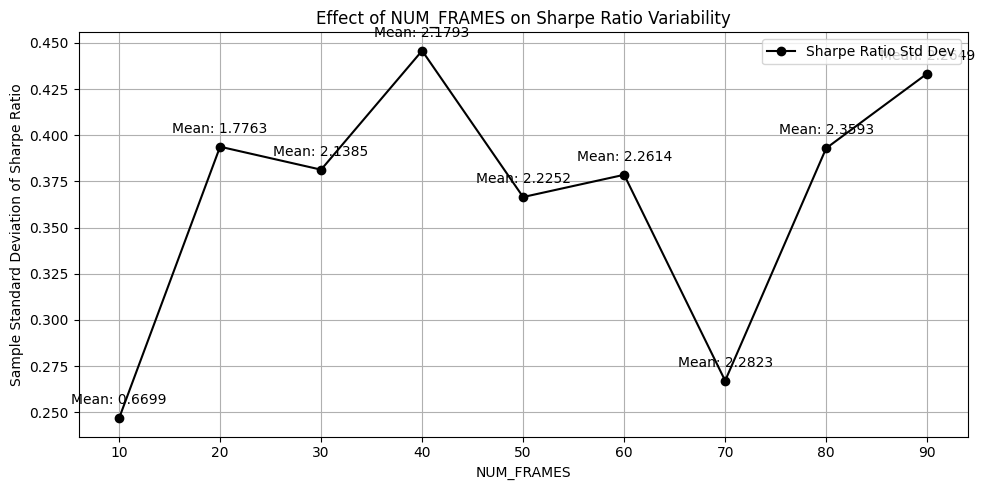

In [611]:
NUM_TESTS = 20  # Number of tests to run for each value of NUM_FRAMES
NUM_FRAMES_RANGE = np.arange(10, 100, 10)  # Range of NUM_FRAMES values to test

# Store the sample standard deviations of Sharpe ratios
sharpe_std_devs = []
sharpe_ratios_all = []

# Define the run_simulation function
def run_simulation(ALPHA, NUM_FRAMES, POWER):
    # Initialize the SlimeModel
    model = SlimeModel(GRID_SIZE, nutrients_info=df, decimal_expected_returns=decimal_expected_returns, covariance_matrix=covariance_matrix, ALPHA=ALPHA, POWER=POWER, NUM_FRAMES=NUM_FRAMES)
    
    # Run the simulation
    for _ in range(NUM_FRAMES):
        model.update()

    # Calculate portfolio statistics
    return model.calculate_portfolio_statistics()

# Run simulations and calculate sample standard deviations
for num_frames in NUM_FRAMES_RANGE:
    sharpe_ratios = []
    for test_num in range(1, NUM_TESTS + 1):
        sharpe_ratio = run_simulation(0.5, num_frames, 40)[2]
        sharpe_ratios.append(sharpe_ratio)
        print(f'Test number {test_num}/{NUM_TESTS} done for NUM_FRAMES = {num_frames} from max {max(NUM_FRAMES_RANGE)}')
    sharpe_std_dev = np.std(sharpe_ratios, ddof=1)  # Using Bessel's correction (ddof=1) for sample standard deviation
    sharpe_std_devs.append(sharpe_std_dev)
    sharpe_ratios_all.append(sharpe_ratios)

# Calculate the mean Sharpe ratios for each NUM_FRAMES value
sharpe_means = [np.mean(ratios) for ratios in sharpe_ratios_all]

# Plotting the sample standard deviation of Sharpe ratios
plt.figure(figsize=(10, 5))
plt.plot(NUM_FRAMES_RANGE, sharpe_std_devs, color='black', marker='o', linestyle='-', label='Sharpe Ratio Std Dev')
for i, (mean, std_dev) in enumerate(zip(sharpe_means, sharpe_std_devs)):
    plt.annotate(f'Mean: {mean:.4f}', (NUM_FRAMES_RANGE[i], std_dev), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('NUM_FRAMES')
plt.ylabel('Sample Standard Deviation of Sharpe Ratio')
plt.title('Effect of NUM_FRAMES on Sharpe Ratio Variability')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


It looks like using 10 or 70 NUM_FRAMES minimises the standard deviation of the results. We wil use NUM_FRAMES=70 for future simulations to give slime sufficient time for stabilisation.

### 3.3.2 Tuning Parameters
Now we can analyse the effects of the POWER and ALPHA parameters so we can choose ones that maximise the Sharpe Ratio produced by the model. 

#### 3.3.2.1 Tuning POWER Parameter
The POWER parameter influences the non-linear transformation applied to the probabilities that dictate the slime's movement, affecting how strongly the slime is attracted to nutrients and repelled by rough terrain.

In this analysis, we investigate the effect of POWER on the Sharpe Ratio and analyse the mean and standard deviation of the Sharpe Ratio for the various POWER values. Here we use an even model (ALPHA = 0.5) and the ideal 70 frames found in 3.3.1.

Running simulation 1/10 for POWER = 1, 1/21
  Stock Name Coordinates Expected Return  Nutrient Concentration  Variance  \
0        BHP    (22, 42)          10.74%                    0.64  0.015507   
1        CBA    (30, 10)          -2.74%                    0.27  0.010057   
2        CSL     (0, 41)         -11.18%                    0.05  0.020280   
3        NAB    (41, 16)         -10.09%                    0.07  0.011505   
4        ANZ     (34, 0)          -1.52%                    0.31  0.011118   
5        WBC     (45, 8)         -12.86%                    0.00  0.011104   
6        WDS    (49, 39)          -1.43%                    0.31  0.016532   
7        FMG    (28, 48)          24.21%                    1.00  0.022156   
8        MQG     (15, 5)           0.26%                    0.35  0.013305   
9        WES     (4, 15)          15.23%                    0.76  0.010835   

   Terrain Roughness  Slime Concentration   Weights  
0           0.450440            22.213936  

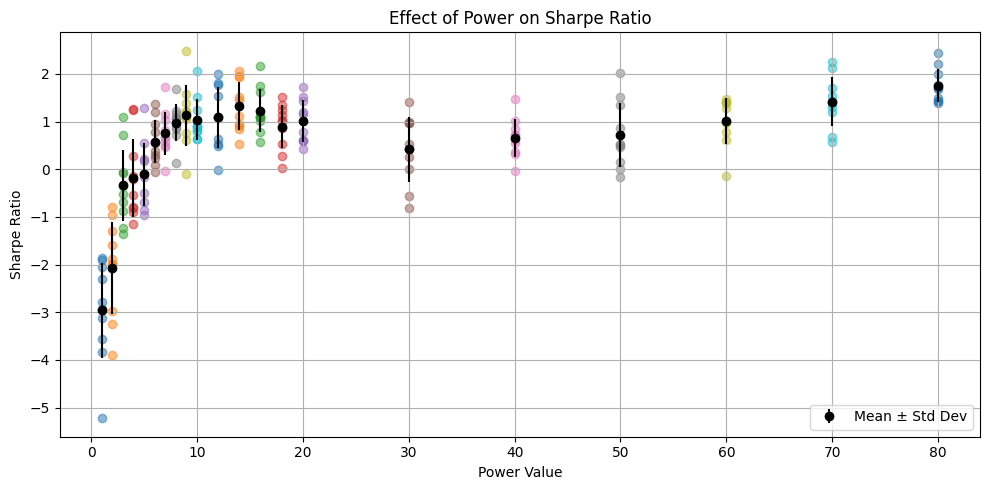

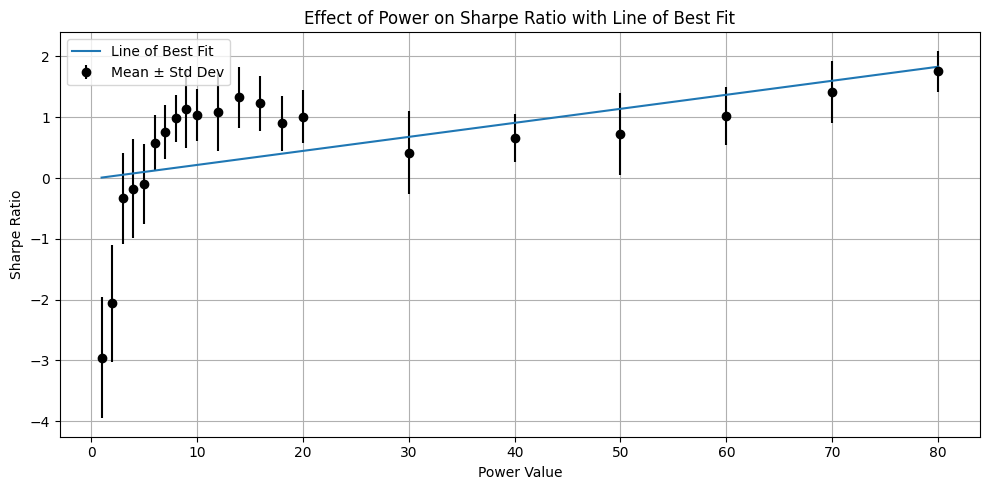

In [616]:
def run_simulation(ALPHA, NUM_FRAMES, POWER):
    model = SlimeModel(GRID_SIZE, nutrients_info=df, decimal_expected_returns=decimal_expected_returns, covariance_matrix=covariance_matrix, ALPHA=ALPHA, POWER=POWER, NUM_FRAMES=NUM_FRAMES)
    
    # Run the simulation
    for _ in range(NUM_FRAMES):
        model.update()
    
    # Calculate portfolio statistics
    return model.calculate_portfolio_statistics()

# Simulation parameters
GRID_SIZE = 50
NUM_FRAMES = 70
ALPHA = 0.5 
POWERS = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]) # Chosen powers to test
NUM_TRIALS = 10

# Run simulations for varying powers with multiple trials
power_sharpe_ratios = np.zeros((len(POWERS), NUM_TRIALS))
for i, POWER in enumerate(POWERS):
    for trial in range(NUM_TRIALS):
        print(f'Running simulation {trial + 1}/{NUM_TRIALS} for POWER = {POWER}, {i + 1}/{len(POWERS)}')
        _, _, sharpe_ratio = run_simulation(ALPHA, NUM_FRAMES, POWER)
        power_sharpe_ratios[i, trial] = sharpe_ratio

# Calculate mean and standard deviation of Sharpe ratios for each power value
power_sharpe_mean = np.mean(power_sharpe_ratios, axis=1)
power_sharpe_std = np.std(power_sharpe_ratios, axis=1)

# Scatter Plot of Sharpe Ratios for Each Power Value
plt.figure(figsize=(10, 5))
for i, POWER in enumerate(POWERS):
    plt.scatter([POWER] * NUM_TRIALS, power_sharpe_ratios[i, :], alpha=0.5)
plt.errorbar(POWERS, power_sharpe_mean, yerr=power_sharpe_std, fmt='o', color='black', label='Mean ± Std Dev')
plt.xlabel('Power Value')
plt.ylabel('Sharpe Ratio')
plt.title('Effect of Power on Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally: Fit a Line of Best Fit
coefficients = np.polyfit(POWERS, power_sharpe_mean, 1)
polynomial = np.poly1d(coefficients)
xs = np.linspace(min(POWERS), max(POWERS), 100)
ys = polynomial(xs)

plt.figure(figsize=(10, 5))
plt.errorbar(POWERS, power_sharpe_mean, yerr=power_sharpe_std, fmt='o', color='black', label='Mean ± Std Dev')
plt.plot(xs, ys, label='Line of Best Fit')
plt.xlabel('Power Value')
plt.ylabel('Sharpe Ratio')
plt.title('Effect of Power on Sharpe Ratio with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Nice! Although this is an interesting shape, we can see that a POWER of 80 is a clear choice to maximise the Sharpe Ratio and minimise the variance of outcomes.

#### 3.3.2.2 ALPHA Parameter Analysis
Now, we examine the risk sentiment parameter. Remember, a low ALPHA corresponds to risk-adverse profile construction and a high one to risk-seeking construction. 

Here, we analyse ALPHA's between 0 and 1 in increments of 0.05 and run 10 tests for each value to build a picture of the mean and variance in sharpe ratios produced by these values. We also plot the mean alphas on a graph of Expected Risk vs Expected Standard Deviation, which gives us a view of the possible optimal portfolios for different levels of risk aversion.

Running simulation for ALPHA = 0.00, Test 1/10, 1/21
  Stock Name Coordinates Expected Return  Nutrient Concentration  Variance  \
0        BHP    (22, 42)          10.74%                    0.64  0.015507   
1        CBA    (30, 10)          -2.74%                    0.27  0.010057   
2        CSL     (0, 41)         -11.18%                    0.05  0.020280   
3        NAB    (41, 16)         -10.09%                    0.07  0.011505   
4        ANZ     (34, 0)          -1.52%                    0.31  0.011118   
5        WBC     (45, 8)         -12.86%                    0.00  0.011104   
6        WDS    (49, 39)          -1.43%                    0.31  0.016532   
7        FMG    (28, 48)          24.21%                    1.00  0.022156   
8        MQG     (15, 5)           0.26%                    0.35  0.013305   
9        WES     (4, 15)          15.23%                    0.76  0.010835   

   Terrain Roughness  Slime Concentration   Weights  
0           0.450440             1

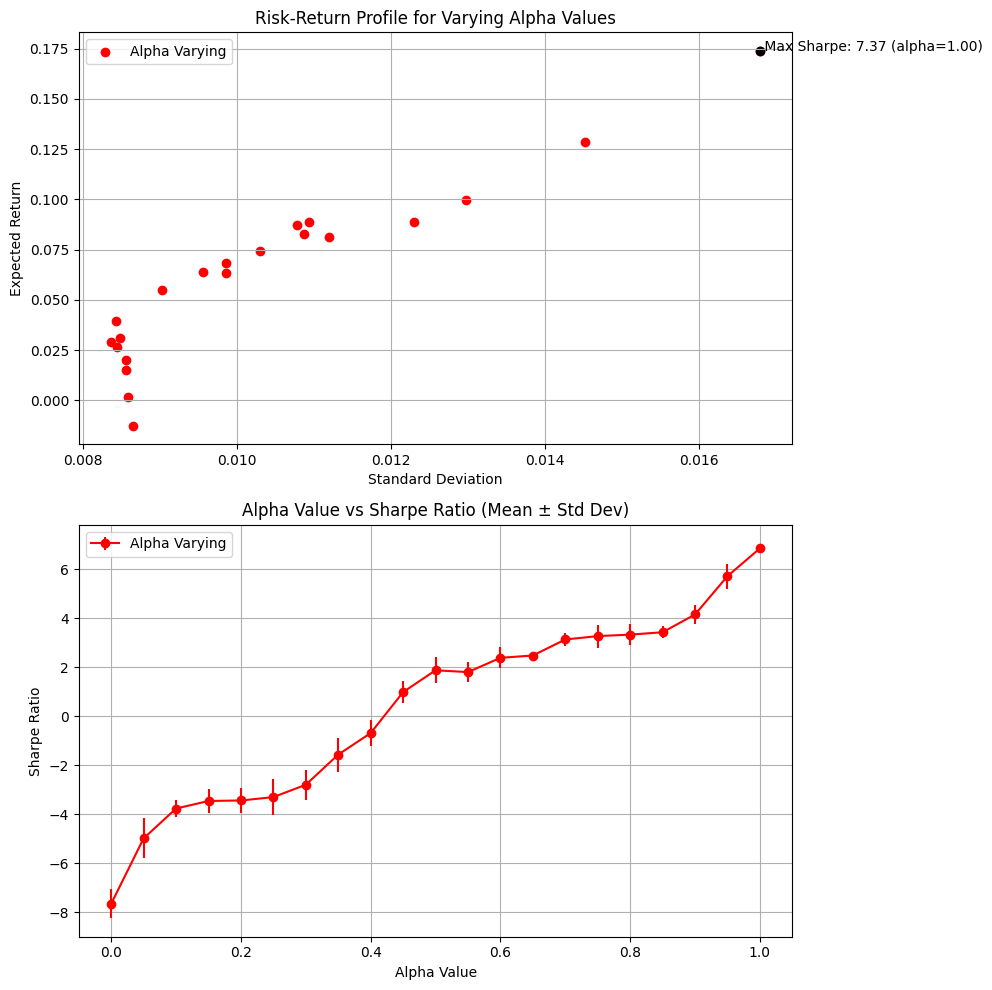

In [618]:
def run_simulation(ALPHA, NUM_FRAMES, POWER):
    model = SlimeModel(GRID_SIZE, nutrients_info=df, decimal_expected_returns=decimal_expected_returns, covariance_matrix=covariance_matrix, ALPHA=ALPHA, POWER=POWER, NUM_FRAMES=NUM_FRAMES)
    
    # Run the simulation
    for _ in range(NUM_FRAMES):
        model.update()
    
    # Calculate portfolio statistics
    return model.calculate_portfolio_statistics()

# Simulation parameters
GRID_SIZE = 50
NUM_FRAMES = 70
ALPHAS = np.linspace(0, 1, 21)  # Range of alpha values to test
POWER = 80
NUM_TESTS = 10  # Number of tests to run for each alpha value

# Run simulations for varying alphas
alpha_stats = []
for i, ALPHA in enumerate(ALPHAS, start=1):
    sharpe_ratios = []
    for test in range(NUM_TESTS):
        print(f'Running simulation for ALPHA = {ALPHA:.2f}, Test {test+1}/{NUM_TESTS}, {i}/{len(ALPHAS)}')
        _, _, sharpe_ratio = run_simulation(ALPHA, NUM_FRAMES, POWER)
        sharpe_ratios.append(sharpe_ratio)
    alpha_stats.append((np.mean(sharpe_ratios), np.std(sharpe_ratios)))
alpha_sharpe_means, alpha_sharpe_stds = zip(*alpha_stats)

# Set up plots for alpha analysis
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Scatter Plot for varying alphas
axs[0].scatter(alpha_std_devs, alpha_expected_returns, color='red', label='Alpha Varying')
axs[0].scatter(alpha_std_devs[max_sharpe_idx_alpha], alpha_expected_returns[max_sharpe_idx_alpha], color='black')  # Highlight the point with max Sharpe ratio for alpha
axs[0].text(alpha_std_devs[max_sharpe_idx_alpha], alpha_expected_returns[max_sharpe_idx_alpha], f' Max Sharpe: {max_sharpe_ratio_alpha:.2f} (alpha={alpha_max_sharpe:.2f})', color='black')
axs[0].set_xlabel('Standard Deviation')
axs[0].set_ylabel('Expected Return')
axs[0].set_title('Risk-Return Profile for Varying Alpha Values')
axs[0].legend()
axs[0].grid(True)

# Line Plot for varying alphas (mean and std of Sharpe ratios)
axs[1].errorbar(ALPHAS, alpha_sharpe_means, yerr=alpha_sharpe_stds, color='red', label='Alpha Varying', fmt='-o')
axs[1].set_xlabel('Alpha Value')
axs[1].set_ylabel('Sharpe Ratio')
axs[1].set_title('Alpha Value vs Sharpe Ratio (Mean ± Std Dev)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


# 4. Final Result

After the tuning of parameters, the maximum Sharpe Ratio for the slime model given within the range of explored parameters is $7.37$ when Alpha is $1$ (Risk-seeking portfolio). This corresponds to a portfolio construction with the following weights:
- BHP: $33.75\%$
- CBA: $4.31\%$
- CSL: $0.00\%$
- NAB: $0.00\%$
- ANZ: $0.08\%$
- WBC: $0.00\%$
- WDS: $2.79\%$
- FMG: $51.31\%$
- MQG: $3.97\%$
- WES: $3.79\%$

The slime model's portfolio has a total expected return of $16.48\%$, with an expected standard deviation of $1.63\%$, resulting in a Sharpe ratio of $7.04$.  



The optimal portfolio generated by the financial theory of Modern Portfolio Theory (MPT) yields different results. According to MPT, the optimal portfolio is constructed with the following weights:
- BHP: $0.00\%$
- CBA: $0.00\%$
- CSL: $0.00\%$
- NAB: $0.00\%$
- ANZ: $0.00\%$
- WBC: $0.00\%$
- WDS: $0.00\%$
- FMG: $30.27\%$
- MQG: $0.00\%$
- WES: $69.73\%$

The expected return of this MPT portfolio is $17.95\%$, with a standard deviation of $1.09\%$, resulting in a Sharpe ratio of $11.88$. This highlights a significant difference in portfolio construction and performance between the slime model and the MPT approach.


# 5. Discussion

#### 5.1 Representation of Financial Concepts
The representation of covariance, expected return and variance/risk as distance, nutrient size and roughness, respectively, was explained in the introduction and makes logical sense. However, the way this is done (cellular automata model, grid size, MDS to get coordinates for nutrients, field gradient functions, measures of distance used, the functions used to normalise probabilities) all impacts the function and results of the model. These are all additional aspects of the model that could be changed and explored. However, due to the amount of these parameters and the complexity of the model it was determined that this was out of the scope of the project.

For example, MDS is used to to represent covariances between stocks as distances between nutrients in the world. While this implementation facilitates visualisation and comprehension it results in a significant loss of accuracy to this representation because of the reduction in dimension. An alternative implementation could representing the world in higher dimensional space with either 10 dimensions (no loss of accuracy) or analysing and balancing the trade-off between loss of accuracy in distance representation and the number of dimensions.

In terms of implementation, if computational power was less limited, implementing the model as an agent-based model and comparing the two would be very intriguing. We could code slime to have an exploratory nature so that it could explore the world and then develop an efficient form. This would would be a better implementation of the model and how Physarum polycephalum acts.

### 5.2 Analysis of Model and Results

- weird shape for num_frames vs srd of sharpe ratio
- shape of effective power graph
- shape fo return/std graph
- shape of alpha vs expected return

Firstly, relationship between the number of frames and the standard deviation of the Sharpe ratio was unexpected, suggesting that the model might reach an equilibrium in the first 10 frames and at 70 frames. This does not match the decreasing trend over number of frames that was expected. Further investigation is needed to optimise the number of frames for stability and efficiency.

Secondly, it is insightful to see the effect of the Power parameter on the efficiency of portfolio construction. This parameter was added due to abundance of randomness in the slimes movement and doesn't have any theoretical backing to its inclusion. The tuning stopped at a value of 80 because values become too small with higher powers (resulting in NaN error). Note that different implementations of the model may not need this parameter.

Tuning the Alpha parameter illustrated the model's capability to navigate the risk-return trade-off. The plotting of Alpha vs sharpe ratio results in a relationship that can be fitted to a linear line, but when considering standard deviation bars, it is not easily characterised by a function. The relationship is not expect and further analysis at different powers would aid in understanding this relationship.

Another note to add, without going into the financial theory, the return/standard deviation graph generated by tuning the ALPHA parameter is very representative of the curve generated by theoretical optimal portfolio construction. This reflects the intelligence of the model in constructing optimal portfolios and the importance in balancing risk appetite despite the sharpe ratio.

### 5.3 Portfolio Construction Results
The slime model's portfolio, with a Sharpe ratio of $7.04$, demonstrates a distinctive investment strategy, deviating from the Modern Portfolio Theory (MPT) optimal portfolio which has a higher Sharpe ratio of $11.88$. The slime portfolio does very well for an innovative and unique approach (achieving a positive result is commendable) but does not boast the efficiency of other Physarum polycephalum applications. This is likely due to the single way the concept was implemented, give the many choices. Exploring other modelling choices and representations as previously discussed, could shed more light on which decisions are limiting the models performance. 


# 6. References

[Mar52] Harry Markowitz. Portfolio selection. The Journal of Finance, 7(1):77–91, 1952.